## Zpracování dat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Házení kostkou
### Hod jednou kostkou

<BarContainer object of 6 artists>

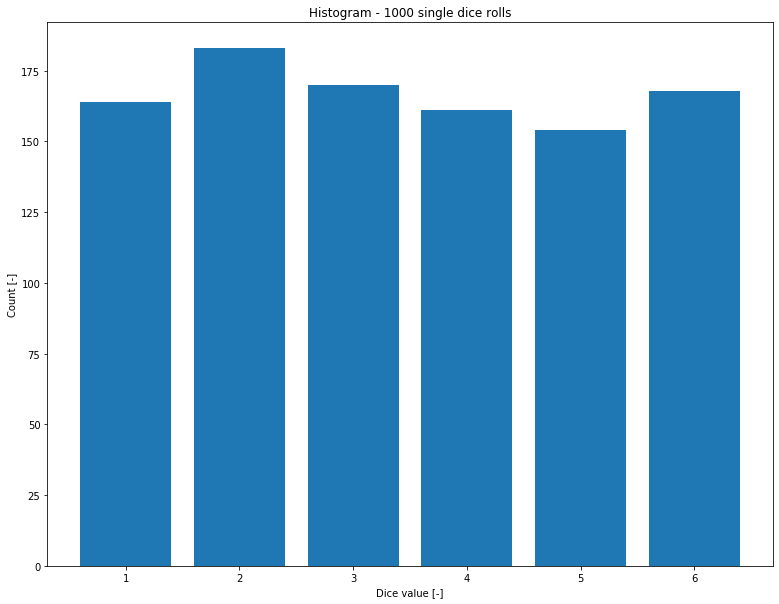

In [2]:
N = 1000
single_dice_roll = np.random.randint(low=1, high=7, size=N).tolist()
counts = []
labels = []
for label in range(1, 7):
    labels.append(str(label))
    counts.append(single_dice_roll.count(label))
plt.figure(figsize=(13,10))
plt.title("Histogram - " + str(N) + " single dice rolls")
plt.xlabel("Dice value [-]")
plt.ylabel("Count [-]")
plt.bar(labels, counts)

### Šest kostek

<BarContainer object of 36 artists>

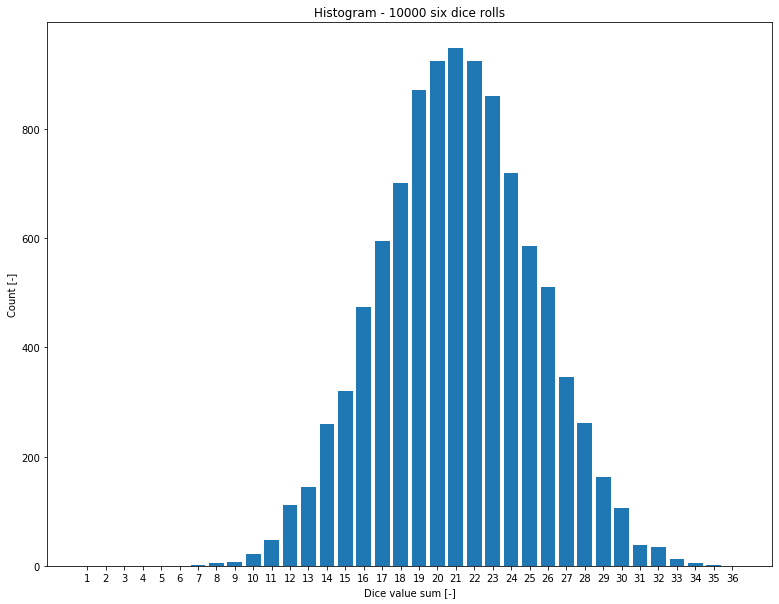

In [3]:
N = 10000
six_dice_roll = np.random.randint(low=1, high=7, size=(6, N))
sum_dice_roll = six_dice_roll.sum(axis=0).tolist()

counts = []
labels = []
for label in range(1, 6 * 6 + 1):
    labels.append(str(label))
    counts.append(sum_dice_roll.count(label))
plt.figure(figsize=(13,10))
plt.title("Histogram - " + str(N) + " six dice rolls")
plt.xlabel("Dice value sum [-]")
plt.ylabel("Count [-]")
plt.bar(labels, counts)

 ## Analýza záznam her Blackjack KOTH

In [4]:
data = pd.read_csv('data/output.csv', delimiter=',')

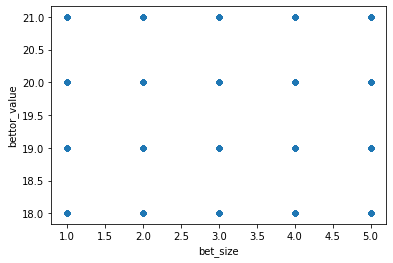

In [5]:
better_player_won = data.loc[data['winner'] == 'Better player']
better_player_bettor = better_player_won.loc[better_player_won['bettor_name'] == 'Better player']
better_player_bettor.plot(kind='scatter', x='bet_size', y='bettor_value')

In [6]:
corr = better_player_bettor['bet_size'].corr(better_player_bettor['bettor_value'])

In [7]:
print(corr)

0.009225292706381354


<BarContainer object of 4 artists>

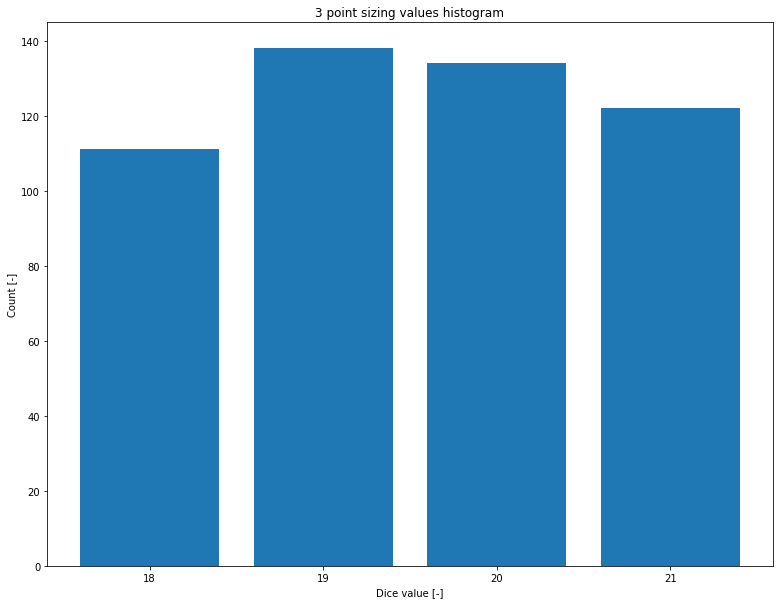

In [8]:
bettor_sizing_3 = better_player_bettor.loc[better_player_bettor['bet_size'] == 3]
analysis_result = bettor_sizing_3.groupby('bettor_value').size()
plt.figure(figsize=(13,10))
plt.title("3 point sizing values histogram")
plt.xlabel("Dice value [-]")
plt.ylabel("Count [-]")
plt.bar([str(_) for _ in analysis_result.index.values], analysis_result.values)